In [1]:
import pandas as pd
import cPickle as pkl
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

%matplotlib inline

import seaborn as sns

In [2]:
pd.options.display.max_rows = 100

Protein synthesis rate per cell (not per transcript):

In [3]:
all_time_tes_annotated = pkl.load(open("../../parameters/all_time_tes_annotated.df"))
len(all_time_tes_annotated)

3727

We want to calculate a table of $\mu$ and $\sigma$ per functional category and time.

How many genes a functional group should have at minimum:

In [4]:
#min_genes = 35
min_genes = 50

In [5]:
all_time_tes_annotated.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YBR177C,0.128333,0.133333,NaN,0.043333,0.055833,0.034167,0.031000,0.037500,0.091667,0.077500,0.123333,0.065000,
YIL140W,0.098333,0.100000,0.040833,0.048333,0.048333,0.031667,NaN,NaN,0.078333,NaN,NaN,NaN,
YLR268W,0.135000,0.110000,0.060333,0.054048,0.055333,0.036458,0.036970,0.034167,0.088333,0.080556,0.120000,0.072222,SNARE interactions in vesicular transport
YJL155C,0.115000,NaN,0.038333,0.053333,0.043333,0.035000,0.025833,0.020000,0.078333,0.080000,0.100000,0.075000,Carbohydrate metabolism
YLR197W,0.143333,0.145000,0.071322,0.069624,0.075333,0.048251,0.048145,0.050645,0.105000,0.108512,0.139792,0.102849,Ribosome biogenesis in eukaryotes


In [6]:
functional_counts = all_time_tes_annotated.Function.value_counts(dropna=False)

We keep only functional groups with at least `min_genes` genes to calculate a better $\mu$ and $\sigma$.
We drop the unlabelled ones.

In [7]:
functional_counts[functional_counts >= min_genes].index.drop(u'')

Index([u'Other enzymes', u'Amino acid metabolism', u'Chromosome-related',
       u'Ribosome', u'Cofactor biosynthesis', u'Lipid and steroid metabolism',
       u'Chaperones and folding catalysts',
       u'Ribosome biogenesis in eukaryotes', u'Glycolysis', u'Spliceosome'],
      dtype='object')

In [8]:
functional_counts.head()

                         1859
Other enzymes             122
Amino acid metabolism     116
Chromosome-related        112
Ribosome                  110
Name: Function, dtype: int64

In [9]:
all_time_tes_annotated_selected = all_time_tes_annotated[all_time_tes_annotated
                                                         .Function.isin(functional_counts[functional_counts >= 
                                                                                          min_genes].index.drop(u''))]
len(all_time_tes_annotated_selected)

831

In [10]:
all_time_tes_annotated_selected.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YLR197W,0.143333,0.145000,0.071322,0.069624,0.075333,0.048251,0.048145,0.050645,0.105000,0.108512,0.139792,0.102849,Ribosome biogenesis in eukaryotes
YGR148C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Ribosome
YBR111W-A,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Chromosome-related
YHR007C,0.149444,0.138889,0.068333,0.068167,0.074417,0.046286,0.046468,0.048476,0.107273,0.103485,0.142222,0.101410,Lipid and steroid metabolism
YBR248C,0.150556,0.132500,0.073095,0.072222,0.068000,0.054545,0.053333,0.051061,0.106000,0.115238,0.135417,0.106000,Amino acid metabolism


Average translational efficiency by function:

In [11]:
means = all_time_tes_annotated_selected.groupby(['Function'], as_index=False).mean()
means.set_index('Function', inplace=True)

Display in color:

In [12]:
#cm = sns.light_palette("blue", as_cmap=True)
cm = sns.diverging_palette(240, 10, n=9, as_cmap=True)

means.round(decimals=3).style.background_gradient(cmap=cm)

In [13]:
print(means.round(decimals=3).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &   0    &   300  &   600  &   900  &   1200 &   1500 &   1800 &   2100 &   2400 &   2700 &   3000 &   3300 \\
Function                          &        &        &        &        &        &        &        &        &        &        &        &        \\
\midrule
Amino acid metabolism             &  0.127 &  0.127 &  0.059 &  0.061 &  0.064 &  0.041 &  0.041 &  0.042 &  0.092 &  0.095 &  0.122 &  0.087 \\
Chaperones and folding catalysts  &  0.120 &  0.121 &  0.063 &  0.065 &  0.068 &  0.044 &  0.044 &  0.045 &  0.095 &  0.094 &  0.118 &  0.089 \\
Chromosome-related                &  0.085 &  0.087 &  0.038 &  0.040 &  0.040 &  0.025 &  0.025 &  0.027 &  0.062 &  0.062 &  0.083 &  0.058 \\
Cofactor biosynthesis             &  0.098 &  0.098 &  0.046 &  0.048 &  0.047 &  0.030 &  0.031 &  0.031 &  0.072 &  0.070 &  0.099 &  0.068 \\
Glycolysis                        &  0.135 &  0.136 &  0.063 &  0.066 &  0.066 &  0.044 &  0.044 &  0.045 &  0.1

Strangely `std()` does not work.

Show only ranks of means to reduce the noise and effect of different scales:

In [14]:
ranks = means.rank(ascending=False)
ranks

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
Function,,,,,,,,,,,,
Amino acid metabolism,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,3.0
Chaperones and folding catalysts,3.0,3.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0
Chromosome-related,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Cofactor biosynthesis,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Glycolysis,1.0,1.0,2.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
Lipid and steroid metabolism,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0
Other enzymes,7.0,7.0,7.0,8.0,8.0,7.0,7.0,8.0,7.0,7.0,7.0,7.0
Ribosome,6.0,6.0,3.0,3.0,3.0,1.0,1.0,2.0,4.0,4.0,6.0,4.0
Ribosome biogenesis in eukaryotes,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0


In [15]:
ranks[3300]

Function
Amino acid metabolism                 3.0
Chaperones and folding catalysts      2.0
Chromosome-related                   10.0
Cofactor biosynthesis                 9.0
Glycolysis                            1.0
Lipid and steroid metabolism          6.0
Other enzymes                         7.0
Ribosome                              4.0
Ribosome biogenesis in eukaryotes     5.0
Spliceosome                           8.0
Name: 3300, dtype: float64

In [16]:
#anks.sort_index(axis='3300')
ranks.sort([3300]).index

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


Index([u'Glycolysis', u'Chaperones and folding catalysts',
       u'Amino acid metabolism', u'Ribosome',
       u'Ribosome biogenesis in eukaryotes', u'Lipid and steroid metabolism',
       u'Other enzymes', u'Spliceosome', u'Cofactor biosynthesis',
       u'Chromosome-related'],
      dtype='object', name=u'Function')

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


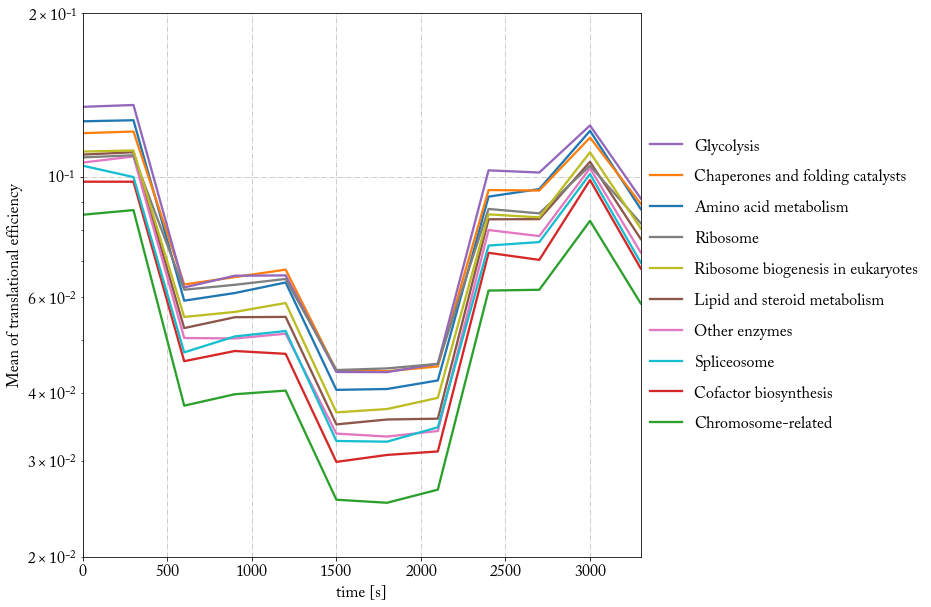

In [17]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = means.transpose().plot(linewidth=2.3)
ax.set_yscale('log')
ax.set_ylim([0.2, 0.02])

plt.xlabel('time [s]')
plt.ylabel('Mean of translational efficiency')
plt.gca().invert_yaxis()
#plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


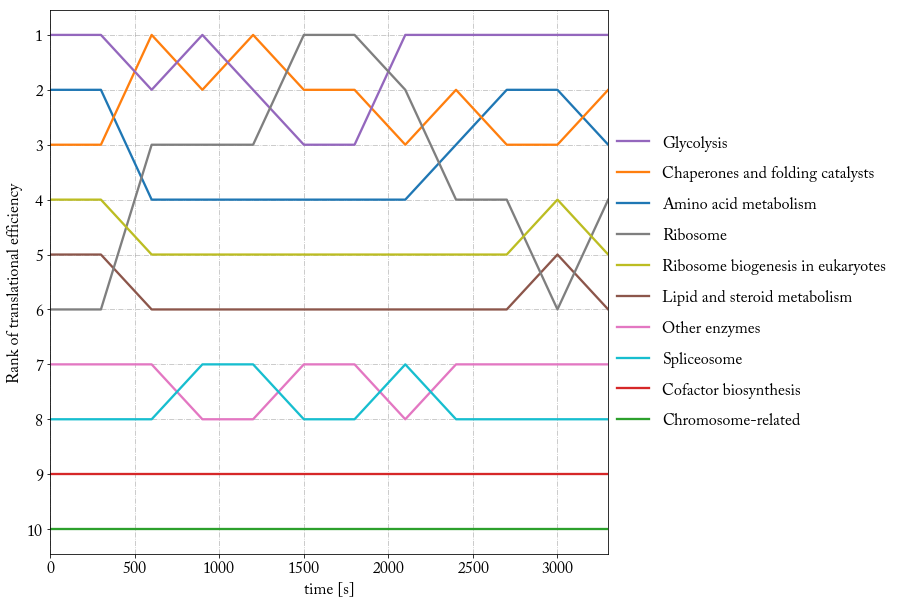

In [18]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3)

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

Same with Computer Modern:

In [19]:
sorted_functions = [('Ribosome', 0.12628066790927703),
 ('Glycolysis', 0.08185288434831853),
 ('Chaperones and folding catalysts', 0.07145962745808186),
 ('Amino acid metabolism', 0.062478004030412454),
 ('Ribosome biogenesis in eukaryotes', 0.0562636947388247),
 ('Lipid and steroid metabolism', 0.05269564143716751),
 ('Other enzymes', 0.05184456762611764),
 ('Cofactor biosynthesis', 0.04967116015179395),
 ('Spliceosome', 0.048536242667356795),
 ('Chromosome-related', 0.04100702207808541)]

See https://github.com/gittenberg/TRSL/blob/master/workbooks/analyses/07a%20TRSL_analyse_time-resolved_translation_efficiencies%20diff.%20cut-off%20and%20colors.ipynb

In [20]:
colordict = {function[0]: cm.Paired(i) for i, function in enumerate(sorted_functions)}

AttributeError: 'LinearSegmentedColormap' object has no attribute 'Paired'

In [ ]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
#matplotlib.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3)

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pdf", bbox_inches='tight')
#plt.show()

TODO: look at Kendall's $\tau$ as per

https://stats.stackexchange.com/questions/29560/can-i-compare-ordinal-rankings-and-if-so-how